In [24]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import Choropleth, GeoJson, GeoJsonTooltip
from shapely.geometry import Point

# Chicago Blockgroup Data

In [3]:
# Load Chicago block groups GeoDataFrame
chicago_gdf = gpd.read_file(r"E:\IIT Chicago\Sem 4\Data Science Practicum - CSP-572\Analysis\Dataset Files\chicago_block_groups.geojson")

In [4]:
chicago_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,031,290900,1,170312909001,1500000US170312909001,Block Group 1,G5030,S,164717,0,+41.8643125,-087.7275607,"POLYGON ((-87.73006 41.8661, -87.72981 41.8661..."
1,17,031,290900,2,170312909002,1500000US170312909002,Block Group 2,G5030,S,164694,0,+41.8606607,-087.7274518,"POLYGON ((-87.72995 41.86245, -87.7297 41.8624..."
2,17,031,290900,3,170312909003,1500000US170312909003,Block Group 3,G5030,S,247352,0,+41.8605723,-087.7335667,"POLYGON ((-87.73729 41.86234, -87.73704 41.862..."
3,17,031,838700,2,170318387002,1500000US170318387002,Block Group 2,G5030,S,163809,0,+41.8607151,-087.7225793,"POLYGON ((-87.72506 41.86252, -87.72481 41.862..."
4,17,031,310200,1,170313102001,1500000US170313102001,Block Group 1,G5030,S,193745,0,+41.8560545,-087.6432837,"POLYGON ((-87.64539 41.85286, -87.64536 41.853..."


In [5]:
chicago_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1977 non-null   object  
 1   COUNTYFP  1977 non-null   object  
 2   TRACTCE   1977 non-null   object  
 3   BLKGRPCE  1977 non-null   object  
 4   GEOID     1977 non-null   object  
 5   GEOIDFQ   1977 non-null   object  
 6   NAMELSAD  1977 non-null   object  
 7   MTFCC     1977 non-null   object  
 8   FUNCSTAT  1977 non-null   object  
 9   ALAND     1977 non-null   int32   
 10  AWATER    1977 non-null   int32   
 11  INTPTLAT  1977 non-null   object  
 12  INTPTLON  1977 non-null   object  
 13  geometry  1977 non-null   geometry
dtypes: geometry(1), int32(2), object(11)
memory usage: 200.9+ KB


In [6]:
# Removing unnecessary columns
chicago_gdf = chicago_gdf[['GEOID', 'geometry']]

In [7]:
chicago_gdf.head()

,GEOID,geometry
0,170312909001,"POLYGON ((-87.73006 41.8661, -87.72981 41.8661..."
1,170312909002,"POLYGON ((-87.72995 41.86245, -87.7297 41.8624..."
2,170312909003,"POLYGON ((-87.73729 41.86234, -87.73704 41.862..."
3,170318387002,"POLYGON ((-87.72506 41.86252, -87.72481 41.862..."
4,170313102001,"POLYGON ((-87.64539 41.85286, -87.64536 41.853..."


In [8]:
chicago_gdf.isnull().sum()

GEOID       0
geometry    0
dtype: int64

In [ ]:
# Plot the geometries
chicago_gdf.plot(figsize=(10, 10), edgecolor='black', linewidth=0.5)

# Add title and remove axes
plt.title("Census Block Groups", fontsize=14)
plt.axis('off')
plt.show()

# Vacant Properties Data

In [10]:
vp_df = pd.read_csv(r"E:\IIT Chicago\Sem 4\Data Science Practicum - CSP-572\Analysis\Dataset Files\vacant_properties_with_block_groups.csv")

In [11]:
vp_df.head()

,pin,latitude,longitude,ZONE_CLASS,GEOID
0,20153050090000,41.786737,-87.616929,RM-5,170318345001
1,20154040220000,41.784926,-87.611243,RM-5,170314206001
2,16233030310000,41.858295,-87.720369,RT-4,170312924001
3,20151200050000,41.788597,-87.623452,RT-4,170314005002
4,20092190280000,41.803254,-87.632455,B1-1,170318356001


In [12]:
vp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pin         1142 non-null   int64  
 1   latitude    1142 non-null   float64
 2   longitude   1142 non-null   float64
 3   ZONE_CLASS  1142 non-null   object 
 4   GEOID       1142 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 44.7+ KB


In [13]:
# Count vacant properties per block group
# -----------------------------------------------
bg_counts = vp_df['GEOID'].value_counts().reset_index()
bg_counts.columns = ['GEOID', 'vacant_count']

In [14]:
bg_counts.head()

,GEOID,vacant_count
0,170318348002,47
1,170312519004,43
2,170318367002,27
3,NO_MATCH,27
4,170313801001,21


In [15]:
bg_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GEOID         325 non-null    object
 1   vacant_count  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


# Merging Chicago Blokgroup and Vacant Properties Data

In [16]:
# Ensure both GEOID columns are string type
bg_counts['GEOID'] = bg_counts['GEOID'].astype(str)
chicago_gdf['GEOID'] = chicago_gdf['GEOID'].astype(str)

In [17]:
# Merge counts into block group GeoDataFrame
chicago_gdf = chicago_gdf.merge(bg_counts, on='GEOID', how='left')
chicago_gdf['vacant_count'] = chicago_gdf['vacant_count'].fillna(0)

In [18]:
chicago_gdf.head()

,GEOID,geometry,vacant_count
0,170312909001,"POLYGON ((-87.73006 41.8661, -87.72981 41.8661...",6.0
1,170312909002,"POLYGON ((-87.72995 41.86245, -87.7297 41.8624...",6.0
2,170312909003,"POLYGON ((-87.73729 41.86234, -87.73704 41.862...",3.0
3,170318387002,"POLYGON ((-87.72506 41.86252, -87.72481 41.862...",8.0
4,170313102001,"POLYGON ((-87.64539 41.85286, -87.64536 41.853...",9.0


In [19]:
chicago_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GEOID         1977 non-null   object  
 1   geometry      1977 non-null   geometry
 2   vacant_count  1977 non-null   float64 
dtypes: float64(1), geometry(1), object(1)
memory usage: 46.5+ KB


# Odometer Dataset

In [2]:
df = pd.read_csv(r"E:\IIT Chicago\Sem 4\Data Science Practicum - CSP-572\Analysis\Dataset Files\dataset_emissions_demographic.csv")

In [20]:
df.head()

,vin,zip,make,model,my,purchase_date,Combination MPG,1st Test Date,2nd Test Date,1st Odometer,...,VMT,Fuel Used,Fuel_Type,zipcode,blkgrp,population,households,median_income,housing_units,Emissions
0,WBAEV33452KL68783,60655,BMW,3 Series,2002,5/1/2021,21.0,2020-06-01,NaN,125000,...,NaN,NaN,Gasoline,606551055.0,170317204001,776.0,291.0,158859.0,309.0,NaN
1,1GBFG15R6Y1100200,60632,CHEV,Express Cargo,2000,5/21/2017,NaN,2020-06-01,2024-03-26,206000,...,7000.0,NaN,Gasoline,606321626.0,170315801002,1097.0,422.0,47778.0,494.0,NaN
2,1GCDT136548185796,60501,CHEV,Colorado,2004,6/18/2013,18.0,2020-06-01,2020-06-04,109000,...,0.0,0.0,Gasoline,605011310.0,170318203004,987.0,307.0,46047.0,366.0,0.000000
3,2GKALMEK0C6364495,60453,GMC,Terrain,2012,4/26/2018,20.0,2020-06-01,2024-05-03,80000,...,20000.0,1000.0,Gasoline,604534400.0,170318226013,520.0,278.0,61786.0,278.0,8.943662
4,1HGCG1652YA094701,60459,HOND,Accord,2000,7/19/2014,23.0,2020-06-01,NaN,167000,...,NaN,NaN,Gasoline,604591106.0,170318209013,750.0,235.0,91036.0,235.0,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195673 entries, 0 to 5195672
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   vin                     object 
 1   zip                     int64  
 2   make                    object 
 3   model                   object 
 4   my                      int64  
 5   purchase_date           object 
 6   Combination MPG         float64
 7   1st Test Date           object 
 8   2nd Test Date           object 
 9   1st Odometer            int64  
 10  2nd Odometer            float64
 11  Date Difference (Days)  float64
 12  VMT                     float64
 13  Fuel Used               float64
 14  Fuel_Type               object 
 15  zipcode                 float64
 16  blkgrp                  int64  
 17  population              float64
 18  households              float64
 19  median_income           float64
 20  housing_units           float64
 21  Emissions               float64

## Creating new columns - Age of the vehicle

In [22]:
# Convert purchase_date to datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Calculate age in years as of 2025
df['car_age_2025'] = 2025 - df['purchase_date'].dt.year

In [25]:
df.head()

,vin,zip,make,model,my,purchase_date,Combination MPG,1st Test Date,2nd Test Date,1st Odometer,...,Fuel Used,Fuel_Type,zipcode,blkgrp,population,households,median_income,housing_units,Emissions,car_age_2025
0,WBAEV33452KL68783,60655,BMW,3 Series,2002,2021-05-01,21.0,2020-06-01,NaN,125000,...,NaN,Gasoline,606551055.0,170317204001,776.0,291.0,158859.0,309.0,NaN,4
1,1GBFG15R6Y1100200,60632,CHEV,Express Cargo,2000,2017-05-21,NaN,2020-06-01,2024-03-26,206000,...,NaN,Gasoline,606321626.0,170315801002,1097.0,422.0,47778.0,494.0,NaN,8
2,1GCDT136548185796,60501,CHEV,Colorado,2004,2013-06-18,18.0,2020-06-01,2020-06-04,109000,...,0.0,Gasoline,605011310.0,170318203004,987.0,307.0,46047.0,366.0,0.000000,12
3,2GKALMEK0C6364495,60453,GMC,Terrain,2012,2018-04-26,20.0,2020-06-01,2024-05-03,80000,...,1000.0,Gasoline,604534400.0,170318226013,520.0,278.0,61786.0,278.0,8.943662,7
4,1HGCG1652YA094701,60459,HOND,Accord,2000,2014-07-19,23.0,2020-06-01,NaN,167000,...,NaN,Gasoline,604591106.0,170318209013,750.0,235.0,91036.0,235.0,NaN,11


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195673 entries, 0 to 5195672
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   vin                     object        
 1   zip                     int64         
 2   make                    object        
 3   model                   object        
 4   my                      int64         
 5   purchase_date           datetime64[ns]
 6   Combination MPG         float64       
 7   1st Test Date           object        
 8   2nd Test Date           object        
 9   1st Odometer            int64         
 10  2nd Odometer            float64       
 11  Date Difference (Days)  float64       
 12  VMT                     float64       
 13  Fuel Used               float64       
 14  Fuel_Type               object        
 15  zipcode                 float64       
 16  blkgrp                  int64         
 17  population              float64       
 18  ho

## Grouping the data by blockgroups

In [ ]:
# Group by block group
grouped = df.groupby('blkgrp')

# Aggregate static census info (same for all rows in a group)
agg_df = grouped.agg({
    'population': 'first',
    'households': 'first',
    'median_income': 'first',
    'housing_units': 'first',
})

# --- Per-car average and median metrics ---
agg_df['avg_VMT_per_car'] = grouped['VMT'].mean()
agg_df['median_VMT_per_car'] = grouped['VMT'].median()

agg_df['avg_MPG_per_car'] = grouped['Combination MPG'].mean()
agg_df['median_MPG_per_car'] = grouped['Combination MPG'].median()

agg_df['avg_Emissions_per_car'] = grouped['Emissions'].mean()
agg_df['median_Emissions_per_car'] = grouped['Emissions'].median()

agg_df['avg_age_per_car'] = grouped['car_age_2025'].mean()
agg_df['median_age_per_car'] = grouped['car_age_2025'].median()

# --- Total number of cars ---
agg_df['num_cars'] = grouped.size()

# --- Per-household average metrics ---
agg_df['avg_VMT_per_household'] = grouped['VMT'].sum() / agg_df['households']
agg_df['avg_MPG_per_household'] = grouped['Combination MPG'].sum() / agg_df['households']
agg_df['avg_Emissions_per_household'] = grouped['Emissions'].sum() / agg_df['households']
agg_df['avg_age_per_household'] = grouped['car_age_2025'].sum() / agg_df['households']

# --- "Median" per-household (less common, but included for completeness) ---
agg_df['median_VMT_per_household'] = grouped['VMT'].median() / agg_df['households']
agg_df['median_MPG_per_household'] = grouped['Combination MPG'].median() / agg_df['households']
agg_df['median_Emissions_per_household'] = grouped['Emissions'].median() / agg_df['households']
agg_df['median_age_per_household'] = grouped['car_age_2025'].median() / agg_df['households']

# --- Cars per household ---
agg_df['cars_per_household'] = agg_df['num_cars'] / agg_df['households']



In [28]:
# --- Emission per person ---
# Average emissions per person
agg_df['avg_Emissions_per_person'] = grouped['Emissions'].sum() / agg_df['population']

# Median emissions per person (less conventional, but for consistency)
agg_df['median_Emissions_per_person'] = grouped['Emissions'].median() / agg_df['population']


In [ ]:
agg_df = agg_df.reset_index()

In [34]:
agg_df.head()

,blkgrp,population,households,median_income,housing_units,avg_VMT_per_car,median_VMT_per_car,avg_MPG_per_car,median_MPG_per_car,avg_Emissions_per_car,...,avg_MPG_per_household,avg_Emissions_per_household,avg_age_per_household,median_VMT_per_household,median_MPG_per_household,median_Emissions_per_household,median_age_per_household,cars_per_household,avg_Emissions_per_person,median_Emissions_per_person
0,0,NaN,NaN,NaN,NaN,15667.182896,15000.0,24.452568,23.0,5.919523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170279001003,NaN,NaN,NaN,NaN,17000.000000,17000.0,21.000000,21.0,7.240107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,170279006024,NaN,NaN,NaN,NaN,41000.000000,41000.0,21.000000,21.0,17.461435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,170310101001,461.0,239.0,98575.0,256.0,14684.210526,11000.0,25.914062,25.0,5.751941,...,13.878661,1.636536,5.669456,46.025105,0.104603,0.018711,0.033473,0.573222,0.848443,0.009700
4,170310101002,1715.0,856.0,25474.0,1133.0,9943.089431,11000.0,24.301370,23.0,3.711644,...,6.217290,0.502980,2.058411,12.850467,0.026869,0.004919,0.007009,0.276869,0.251050,0.002455


In [35]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   blkgrp                          6289 non-null   int64  
 1   population                      3993 non-null   float64
 2   households                      3993 non-null   float64
 3   median_income                   3627 non-null   float64
 4   housing_units                   3993 non-null   float64
 5   avg_VMT_per_car                 6289 non-null   float64
 6   median_VMT_per_car              6289 non-null   float64
 7   avg_MPG_per_car                 6288 non-null   float64
 8   median_MPG_per_car              6288 non-null   float64
 9   avg_Emissions_per_car           6288 non-null   float64
 10  median_Emissions_per_car        6288 non-null   float64
 11  avg_age_per_car                 6289 non-null   float64
 12  median_age_per_car              62

In [36]:
agg_df.isnull().sum()

blkgrp                               0
population                        2296
households                        2296
median_income                     2662
housing_units                     2296
avg_VMT_per_car                      0
median_VMT_per_car                   0
avg_MPG_per_car                      1
median_MPG_per_car                   1
avg_Emissions_per_car                1
median_Emissions_per_car             1
avg_age_per_car                      0
median_age_per_car                   0
num_cars                             0
avg_VMT_per_household             2296
avg_MPG_per_household             2296
avg_Emissions_per_household       2296
avg_age_per_household             2296
median_VMT_per_household          2296
median_MPG_per_household          2296
median_Emissions_per_household    2296
median_age_per_household          2296
cars_per_household                2296
avg_Emissions_per_person          2296
median_Emissions_per_person       2296
dtype: int64

# Merging the Blockgroup Data with Chicago Data

In [37]:
# Make sure blkgrp is a string to match GEOID format
agg_df['blkgrp'] = agg_df['blkgrp'].astype(str)

In [42]:
# Merge on blkgrp (agg_df) and GEOID (chicago_gdf)
merged_gdf = chicago_gdf.merge(agg_df, left_on='GEOID', right_on='blkgrp', how='left')

In [43]:
merged_gdf.head()

,GEOID,geometry,vacant_count,blkgrp,population,households,median_income,housing_units,avg_VMT_per_car,median_VMT_per_car,...,avg_MPG_per_household,avg_Emissions_per_household,avg_age_per_household,median_VMT_per_household,median_MPG_per_household,median_Emissions_per_household,median_age_per_household,cars_per_household,avg_Emissions_per_person,median_Emissions_per_person
0,170312909001,"POLYGON ((-87.73006 41.8661, -87.72981 41.8661...",6.0,170312909001,639.0,301.0,NaN,370.0,13000.000000,9000.0,...,8.308970,0.823332,2.677741,29.900332,0.073090,0.012380,0.019934,0.388704,0.387829,0.005832
1,170312909002,"POLYGON ((-87.72995 41.86245, -87.7297 41.8624...",6.0,170312909002,1252.0,405.0,21708.0,493.0,23272.727273,14000.0,...,9.353086,1.917937,3.135802,34.567901,0.054321,0.012380,0.014815,0.434568,0.620419,0.004005
2,170312909003,"POLYGON ((-87.73729 41.86234, -87.73704 41.862...",3.0,170312909003,844.0,249.0,46992.0,340.0,2257.731959,10000.0,...,19.337349,0.003633,5.807229,40.160643,0.092369,0.016676,0.024096,0.859438,0.001072,0.004920
3,170318387002,"POLYGON ((-87.72506 41.86252, -87.72481 41.862...",8.0,170318387002,1420.0,360.0,31953.0,425.0,11422.535211,11000.0,...,8.055556,0.971130,2.988889,30.555556,0.063889,0.013664,0.016667,0.377778,0.246202,0.003464
4,170313102001,"POLYGON ((-87.64539 41.85286, -87.64536 41.853...",9.0,170313102001,955.0,289.0,121012.0,307.0,13130.000000,13500.0,...,15.418685,1.704628,5.861592,46.712803,0.079585,0.017193,0.024221,0.685121,0.515851,0.005203


In [44]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   GEOID                           1977 non-null   object  
 1   geometry                        1977 non-null   geometry
 2   vacant_count                    1977 non-null   float64 
 3   blkgrp                          1973 non-null   object  
 4   population                      1973 non-null   float64 
 5   households                      1973 non-null   float64 
 6   median_income                   1718 non-null   float64 
 7   housing_units                   1973 non-null   float64 
 8   avg_VMT_per_car                 1973 non-null   float64 
 9   median_VMT_per_car              1973 non-null   float64 
 10  avg_MPG_per_car                 1973 non-null   float64 
 11  median_MPG_per_car              1973 non-null   float64 
 12  avg_Emission

In [45]:
merged_gdf.isnull().sum()

GEOID                               0
geometry                            0
vacant_count                        0
blkgrp                              4
population                          4
households                          4
median_income                     259
housing_units                       4
avg_VMT_per_car                     4
median_VMT_per_car                  4
avg_MPG_per_car                     4
median_MPG_per_car                  4
avg_Emissions_per_car               4
median_Emissions_per_car            4
avg_age_per_car                     4
median_age_per_car                  4
num_cars                            4
avg_VMT_per_household               4
avg_MPG_per_household               4
avg_Emissions_per_household         4
avg_age_per_household               4
median_VMT_per_household            4
median_MPG_per_household            4
median_Emissions_per_household      4
median_age_per_household            4
cars_per_household                  4
avg_Emission

In [46]:
merged_gdf.fillna(0, inplace=True)

In [47]:
# Drop GEOID if you don't need it anymore
merged_gdf = merged_gdf.drop(columns=['GEOID'])

In [48]:
merged_gdf.head()

,geometry,vacant_count,blkgrp,population,households,median_income,housing_units,avg_VMT_per_car,median_VMT_per_car,avg_MPG_per_car,...,avg_MPG_per_household,avg_Emissions_per_household,avg_age_per_household,median_VMT_per_household,median_MPG_per_household,median_Emissions_per_household,median_age_per_household,cars_per_household,avg_Emissions_per_person,median_Emissions_per_person
0,"POLYGON ((-87.73006 41.8661, -87.72981 41.8661...",6.0,170312909001,639.0,301.0,0.0,370.0,13000.000000,9000.0,22.736364,...,8.308970,0.823332,2.677741,29.900332,0.073090,0.012380,0.019934,0.388704,0.387829,0.005832
1,"POLYGON ((-87.72995 41.86245, -87.7297 41.8624...",6.0,170312909002,1252.0,405.0,21708.0,493.0,23272.727273,14000.0,22.547619,...,9.353086,1.917937,3.135802,34.567901,0.054321,0.012380,0.014815,0.434568,0.620419,0.004005
2,"POLYGON ((-87.73729 41.86234, -87.73704 41.862...",3.0,170312909003,844.0,249.0,46992.0,340.0,2257.731959,10000.0,23.602941,...,19.337349,0.003633,5.807229,40.160643,0.092369,0.016676,0.024096,0.859438,0.001072,0.004920
3,"POLYGON ((-87.72506 41.86252, -87.72481 41.862...",8.0,170318387002,1420.0,360.0,31953.0,425.0,11422.535211,11000.0,22.834646,...,8.055556,0.971130,2.988889,30.555556,0.063889,0.013664,0.016667,0.377778,0.246202,0.003464
4,"POLYGON ((-87.64539 41.85286, -87.64536 41.853...",9.0,170313102001,955.0,289.0,121012.0,307.0,13130.000000,13500.0,23.702128,...,15.418685,1.704628,5.861592,46.712803,0.079585,0.017193,0.024221,0.685121,0.515851,0.005203


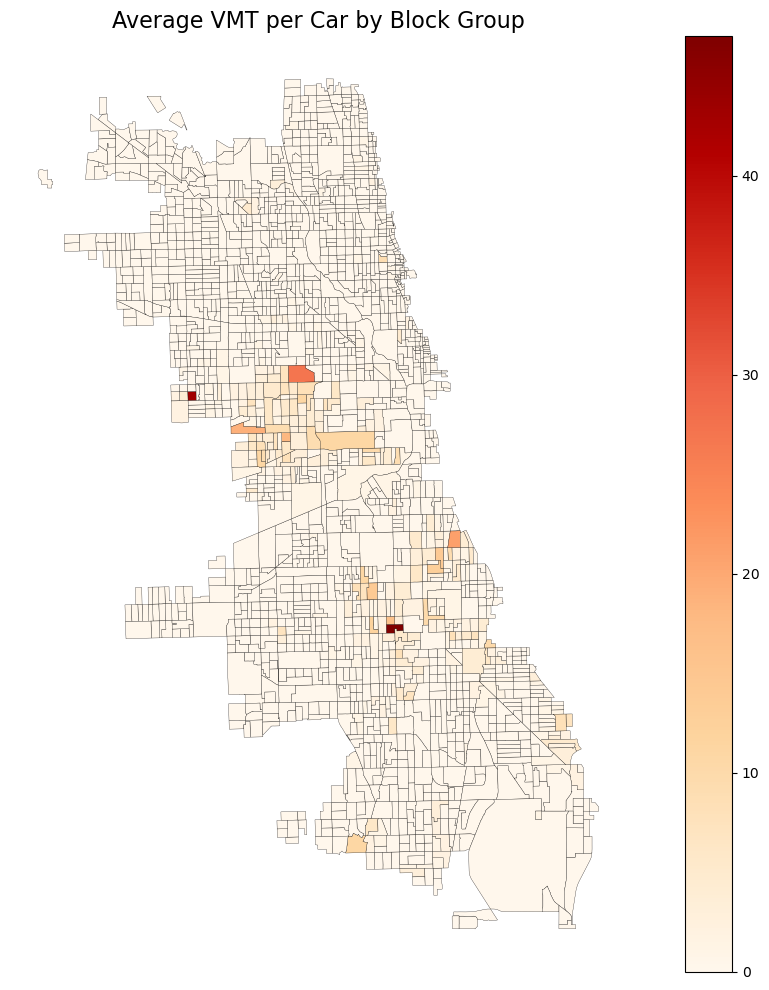

In [50]:
# Plot block groups colored by average VMT per car
merged_gdf.plot(
    column='vacant_count',
    cmap='OrRd',
    legend=True,
    figsize=(12, 10),
    edgecolor='black',
    linewidth=0.2
)

plt.title("Average VMT per Car by Block Group", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Save the dataset

In [51]:
merged_gdf.set_crs("EPSG:4326", inplace=True)  # WGS84 (lat/lon)

,geometry,vacant_count,blkgrp,population,households,median_income,housing_units,avg_VMT_per_car,median_VMT_per_car,avg_MPG_per_car,...,avg_MPG_per_household,avg_Emissions_per_household,avg_age_per_household,median_VMT_per_household,median_MPG_per_household,median_Emissions_per_household,median_age_per_household,cars_per_household,avg_Emissions_per_person,median_Emissions_per_person
0,"POLYGON ((-87.73006 41.8661, -87.72981 41.8661...",6.0,170312909001,639.0,301.0,0.0,370.0,13000.000000,9000.0,22.736364,...,8.308970,0.823332,2.677741,29.900332,0.073090,0.012380,0.019934,0.388704,0.387829,0.005832
1,"POLYGON ((-87.72995 41.86245, -87.7297 41.8624...",6.0,170312909002,1252.0,405.0,21708.0,493.0,23272.727273,14000.0,22.547619,...,9.353086,1.917937,3.135802,34.567901,0.054321,0.012380,0.014815,0.434568,0.620419,0.004005
2,"POLYGON ((-87.73729 41.86234, -87.73704 41.862...",3.0,170312909003,844.0,249.0,46992.0,340.0,2257.731959,10000.0,23.602941,...,19.337349,0.003633,5.807229,40.160643,0.092369,0.016676,0.024096,0.859438,0.001072,0.004920
3,"POLYGON ((-87.72506 41.86252, -87.72481 41.862...",8.0,170318387002,1420.0,360.0,31953.0,425.0,11422.535211,11000.0,22.834646,...,8.055556,0.971130,2.988889,30.555556,0.063889,0.013664,0.016667,0.377778,0.246202,0.003464
4,"POLYGON ((-87.64539 41.85286, -87.64536 41.853...",9.0,170313102001,955.0,289.0,121012.0,307.0,13130.000000,13500.0,23.702128,...,15.418685,1.704628,5.861592,46.712803,0.079585,0.017193,0.024221,0.685121,0.515851,0.005203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,"POLYGON ((-87.57105 41.74803, -87.5708 41.7480...",0.0,170314605002,403.0,122.0,53194.0,122.0,9508.875740,12000.0,23.683582,...,65.032787,4.725282,25.491803,98.360656,0.188525,0.036654,0.057377,2.950820,1.430482,0.011096
1973,"POLYGON ((-87.56323 41.70276, -87.56202 41.702...",1.0,170318388001,491.0,159.0,0.0,180.0,5824.817518,12000.0,23.557312,...,37.484277,1.120589,13.132075,75.471698,0.144654,0.033750,0.037736,1.679245,0.362879,0.010929
1974,"POLYGON ((-87.69187 41.81195, -87.69162 41.811...",0.0,170318428001,646.0,254.0,60461.0,284.0,10696.296296,12000.0,22.448421,...,41.980315,4.057542,14.724409,47.244094,0.086614,0.017606,0.023622,2.015748,1.595380,0.006922
1975,"POLYGON ((-87.73757 41.78214, -87.73751 41.782...",0.0,170316502006,405.0,179.0,143185.0,189.0,17524.064171,12000.0,23.460411,...,44.692737,5.976522,17.569832,67.039106,0.128492,0.022062,0.039106,2.089385,2.641475,0.009751


In [52]:
merged_gdf.to_file(r"E:\IIT Chicago\Sem 4\Data Science Practicum - CSP-572\Analysis\Dataset Files\merged_blockgroups.geojson", driver="GeoJSON")

c:\Users\Siddhant\anaconda3\envs\urban_analytics\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: NaN of Infinity value found. Skipped
  ogr_write(
